In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import folium

file_path = "../../3. Data Cleaning/cleaned_accidents.csv"

# Read the CSV file
data = pd.read_csv(file_path)

In [2]:
data['Severity'].value_counts()

2    9405
4     331
3     192
1      72
Name: Severity, dtype: int64

In [3]:
state_full_names = {
    'CA': 'California',
    'FL': 'Florida',
    'VA': 'Virginia',
    'TX': 'Texas',
    'NY': 'New York',
    'PA': 'Pennsylvania',
    'NC': 'North Carolina',
    'SC': 'South Carolina',
    'OR': 'Oregon',
    'MN': 'Minnesota',
    'AZ': 'Arizona',
    'LA': 'Louisiana',
    'NJ': 'New Jersey',
    'MD': 'Maryland',
    'TN': 'Tennessee',
    'MI': 'Michigan',
    'GA': 'Georgia',
    'UT': 'Utah',
    'IL': 'Illinois',
    'CT': 'Connecticut',
    'WA': 'Washington',
    'CO': 'Colorado',
    'AL': 'Alabama',
    'MO': 'Missouri',
    'OH': 'Ohio',
    'MT': 'Montana',
    'IN': 'Indiana',
    'AR': 'Arkansas',
    'DC': 'District of Columbia',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'WV': 'West Virginia',
    'OK': 'Oklahoma',
    'KS': 'Kansas',
    'MS': 'Mississippi',
    'WI': 'Wisconsin',
    'MA': 'Massachusetts',
    'DE': 'Delaware',
    'NV': 'Nevada',
    'KY': 'Kentucky',
    'NE': 'Nebraska',
    'WY': 'Wyoming',
    'ND': 'North Dakota',
    'ME': 'Maine',
    'RI': 'Rhode Island',
    'NM': 'New Mexico',
    'NH': 'New Hampshire'
}

In [4]:
# Group the data by 'State' and 'Severity' to get the accident count per state and severity
state_severity_accidents = data.groupby(['State', 'Severity']).size().reset_index(name='Accident_Count')

# Dictionary to store latitude and longitude of state centroids (for marker placement)
state_centroids = {
    'CA': [36.7783, -119.4179],  # California
    'FL': [27.9947, -81.7603],  # Florida
    'VA': [37.4316, -78.6569],  # Virginia
    'TX': [31.9686, -99.9018],  # Texas
    'NY': [40.7128, -74.0060],  # New York
    'PA': [41.2033, -77.1945],  # Pennsylvania
    'NC': [35.7596, -79.0193],  # North Carolina
    'SC': [33.8361, -81.1637],  # South Carolina
    'OR': [43.8041, -120.5542],  # Oregon
    'MN': [46.7296, -94.6859],  # Minnesota
    'AZ': [34.0489, -111.0937],  # Arizona
    'LA': [30.9843, -91.9623],  # Louisiana
    'NJ': [40.0583, -74.4057],  # New Jersey
    'MD': [39.0458, -76.6413],  # Maryland
    'TN': [35.5175, -86.5804],  # Tennessee
    'MI': [44.3148, -85.6024],  # Michigan
    'GA': [33.7490, -84.3880],  # Georgia
    'UT': [40.1135, -111.8636],  # Utah
    'IL': [40.6331, -89.3985],  # Illinois
    'CT': [41.6032, -73.0877],  # Connecticut
    'WA': [47.7511, -120.7401],  # Washington
    'CO': [39.5501, -105.7821],  # Colorado
    'AL': [32.8067, -86.7911],  # Alabama
    'MO': [37.9643, -91.8318],  # Missouri
    'OH': [40.4173, -82.9071],  # Ohio
    'MT': [46.8797, -110.3626],  # Montana
    'IN': [40.2670, -86.1349],  # Indiana
    'AR': [34.7465, -92.2896],  # Arkansas
    'DC': [38.9072, -77.0369],  # District of Columbia
    'IA': [41.8780, -93.0977],  # Iowa
    'ID': [44.0682, -114.7420],  # Idaho
    'WV': [38.5976, -80.4549],  # West Virginia
    'OK': [35.4676, -97.5164],  # Oklahoma
    'KS': [39.0119, -98.4842],  # Kansas
    'MS': [32.3547, -89.3985],  # Mississippi
    'WI': [43.7844, -88.7879],  # Wisconsin
    'MA': [42.4072, -71.3824],  # Massachusetts
    'DE': [38.9108, -75.5277],  # Delaware
    'NV': [38.8026, -116.4194],  # Nevada
    'KY': [37.8393, -84.2700],  # Kentucky
    'NE': [41.1254, -98.2681],  # Nebraska
    'WY': [43.0759, -107.2903],  # Wyoming
    'ND': [47.5515, -101.0020],  # North Dakota
    'ME': [44.2998, -69.4495],  # Maine
    'RI': [41.6809, -71.5118],  # Rhode Island
    'NM': [34.5199, -105.8701],  # New Mexico
    'NH': [43.1939, -71.5724]   # New Hampshire
}

# Create a map centered around the USA
m = folium.Map([37.0902, -95.7129], zoom_start=5)

In [5]:
# Group the data by 'State' and 'Severity' to get the accident count per state and severity
state_severity_accidents = data.groupby(['State', 'Severity']).size().reset_index(name='Accident_Count')

# Dictionary to store latitude and longitude of state centroids (for marker placement)
state_centroids = {
    'CA': [36.7783, -119.4179],  # California
    'FL': [27.9947, -81.7603],  # Florida
    'VA': [37.4316, -78.6569],  # Virginia
    'TX': [31.9686, -99.9018],  # Texas
    'NY': [40.7128, -74.0060],  # New York
    'PA': [41.2033, -77.1945],  # Pennsylvania
    'NC': [35.7596, -79.0193],  # North Carolina
    'SC': [33.8361, -81.1637],  # South Carolina
    'OR': [43.8041, -120.5542],  # Oregon
    'MN': [46.7296, -94.6859],  # Minnesota
    'AZ': [34.0489, -111.0937],  # Arizona
    'LA': [30.9843, -91.9623],  # Louisiana
    'NJ': [40.0583, -74.4057],  # New Jersey
    'MD': [39.0458, -76.6413],  # Maryland
    'TN': [35.5175, -86.5804],  # Tennessee
    'MI': [44.3148, -85.6024],  # Michigan
    'GA': [33.7490, -84.3880],  # Georgia
    'UT': [40.1135, -111.8636],  # Utah
    'IL': [40.6331, -89.3985],  # Illinois
    'CT': [41.6032, -73.0877],  # Connecticut
    'WA': [47.7511, -120.7401],  # Washington
    'CO': [39.5501, -105.7821],  # Colorado
    'AL': [32.8067, -86.7911],  # Alabama
    'MO': [37.9643, -91.8318],  # Missouri
    'OH': [40.4173, -82.9071],  # Ohio
    'MT': [46.8797, -110.3626],  # Montana
    'IN': [40.2670, -86.1349],  # Indiana
    'AR': [34.7465, -92.2896],  # Arkansas
    'DC': [38.9072, -77.0369],  # District of Columbia
    'IA': [41.8780, -93.0977],  # Iowa
    'ID': [44.0682, -114.7420],  # Idaho
    'WV': [38.5976, -80.4549],  # West Virginia
    'OK': [35.4676, -97.5164],  # Oklahoma
    'KS': [39.0119, -98.4842],  # Kansas
    'MS': [32.3547, -89.3985],  # Mississippi
    'WI': [43.7844, -88.7879],  # Wisconsin
    'MA': [42.4072, -71.3824],  # Massachusetts
    'DE': [38.9108, -75.5277],  # Delaware
    'NV': [38.8026, -116.4194],  # Nevada
    'KY': [37.8393, -84.2700],  # Kentucky
    'NE': [41.1254, -98.2681],  # Nebraska
    'WY': [43.0759, -107.2903],  # Wyoming
    'ND': [47.5515, -101.0020],  # North Dakota
    'ME': [44.2998, -69.4495],  # Maine
    'RI': [41.6809, -71.5118],  # Rhode Island
    'NM': [34.5199, -105.8701],  # New Mexico
    'NH': [43.1939, -71.5724]   # New Hampshire
}

# Create a map centered around the USA
m = folium.Map([37.0902, -95.7129], zoom_start=5)

# Loop through the grouped data to add markers for each state and severity
for _, row in state_severity_accidents.iterrows():
    state = row['State']
    severity = row['Severity']
    accident_count = row['Accident_Count']

    # Use state centroid to place marker (ensure state is in the dictionary)
    if state in state_centroids:
        lat, lon = state_centroids[state]

        # Define color based on severity (assuming 1=low, 2=medium, 3=high)
        if severity == 1:
            marker_color = 'green'
        elif severity == 2:
            marker_color = 'yellow'
        elif severity == 3:
            marker_color = 'orange'
        elif severity == 4:
            marker_color = 'red'
        
        # Adjust marker size based on accident count
        marker_radius = 10 + (accident_count / 100)  # Adjust radius for visibility

        # Add CircleMarker for state and severity with accident count
        folium.CircleMarker(
            location=[lat, lon],
            radius=marker_radius,
            color=marker_color,
            fill=True,
            fill_color=marker_color,
            fill_opacity=0.7,
            popup=f"State: {state_full_names.get(state, state)}<br>Severity: {severity}<br>Accidents: {accident_count}",
            tooltip=f"Severity: {severity}<br>Accidents: {accident_count}"
        ).add_to(m)
        
# Create a legend for severity levels
legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 150px; height: 120px; 
                background-color: white; border: 2px solid black; z-index: 9999; 
                font-size: 12px; padding: 10px;">
        <b>Severity Levels</b><br>
        <i style="background: green; width: 20px; height: 10px; display: inline-block;"></i> Low (1)<br>
        <i style="background: yellow; width: 20px; height: 10px; display: inline-block;"></i> Medium (2)<br>
        <i style="background: orange; width: 20px; height: 10px; display: inline-block;"></i> High (3)<br>
        <i style="background: red; width: 20px; height: 10px; display: inline-block;"></i> Very High (4)
    </div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))        

# Save to HTML file if needed
m.save('accidents_per_state_severity_map.html')

# Display the map (in Jupyter)
m

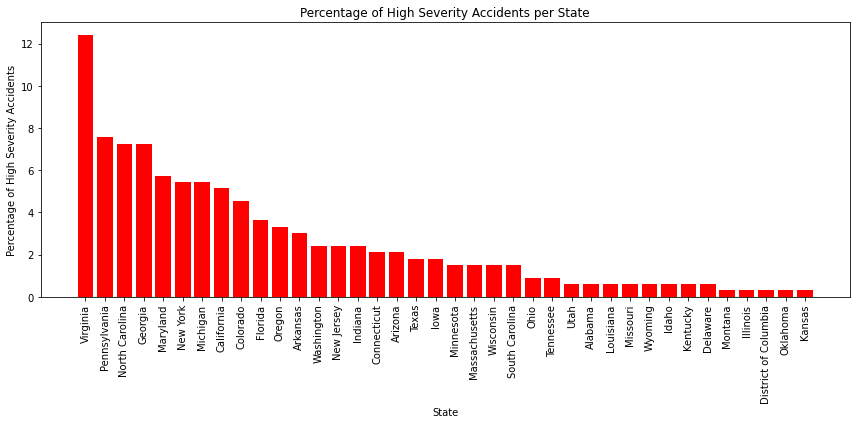

In [6]:
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Dictionary to map state abbreviations to full names
state_full_names = {
    'CA': 'California', 'FL': 'Florida', 'VA': 'Virginia', 'TX': 'Texas',
    'NY': 'New York', 'PA': 'Pennsylvania', 'NC': 'North Carolina', 
    'SC': 'South Carolina', 'OR': 'Oregon', 'MN': 'Minnesota', 
    'AZ': 'Arizona', 'LA': 'Louisiana', 'NJ': 'New Jersey', 'MD': 'Maryland', 
    'TN': 'Tennessee', 'MI': 'Michigan', 'GA': 'Georgia', 'UT': 'Utah', 
    'IL': 'Illinois', 'CT': 'Connecticut', 'WA': 'Washington', 'CO': 'Colorado', 
    'AL': 'Alabama', 'MO': 'Missouri', 'OH': 'Ohio', 'MT': 'Montana', 
    'IN': 'Indiana', 'AR': 'Arkansas', 'DC': 'District of Columbia', 
    'IA': 'Iowa', 'ID': 'Idaho', 'WV': 'West Virginia', 'OK': 'Oklahoma', 
    'KS': 'Kansas', 'MS': 'Mississippi', 'WI': 'Wisconsin', 'MA': 'Massachusetts', 
    'DE': 'Delaware', 'NV': 'Nevada', 'KY': 'Kentucky', 'NE': 'Nebraska', 
    'WY': 'Wyoming', 'ND': 'North Dakota', 'ME': 'Maine', 'RI': 'Rhode Island', 
    'NM': 'New Mexico', 'NH': 'New Hampshire'
}

# Filter the data for high severity accidents (Severity == 4)
high_severity_data = data[data['Severity'] == 4]

# Group by state and count the number of high severity accidents
high_severity_per_state = high_severity_data['State'].value_counts().reset_index()
high_severity_per_state.columns = ['State', 'High_Severity_Accidents']

# Calculate the total number of high severity accidents
total_high_severity_accidents = high_severity_per_state['High_Severity_Accidents'].sum()

# Calculate the percentage of high severity accidents for each state
high_severity_per_state['Percentage'] = (high_severity_per_state['High_Severity_Accidents'] / total_high_severity_accidents) * 100

# Sort by the percentage of high severity accidents for better visualization
high_severity_per_state = high_severity_per_state.sort_values(by='Percentage', ascending=False)

# Replace state abbreviations with full names
high_severity_per_state['State'] = high_severity_per_state['State'].map(state_full_names)

# Plotting the high severity accidents percentage per state
plt.figure(figsize=(12, 6))
plt.bar(high_severity_per_state['State'], high_severity_per_state['Percentage'], color='red')
plt.title('Percentage of High Severity Accidents per State')
plt.xlabel('State')
plt.ylabel('Percentage of High Severity Accidents')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

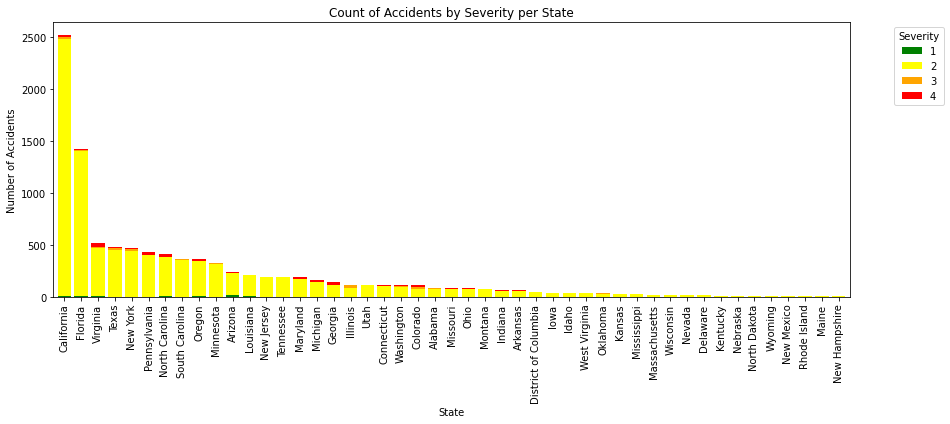

In [11]:
import matplotlib.pyplot as plt

# Dictionary to map state abbreviations to full names
state_full_names = {
    'CA': 'California', 'FL': 'Florida', 'VA': 'Virginia', 'TX': 'Texas',
    'NY': 'New York', 'PA': 'Pennsylvania', 'NC': 'North Carolina', 
    'SC': 'South Carolina', 'OR': 'Oregon', 'MN': 'Minnesota', 
    'AZ': 'Arizona', 'LA': 'Louisiana', 'NJ': 'New Jersey', 'MD': 'Maryland', 
    'TN': 'Tennessee', 'MI': 'Michigan', 'GA': 'Georgia', 'UT': 'Utah', 
    'IL': 'Illinois', 'CT': 'Connecticut', 'WA': 'Washington', 'CO': 'Colorado', 
    'AL': 'Alabama', 'MO': 'Missouri', 'OH': 'Ohio', 'MT': 'Montana', 
    'IN': 'Indiana', 'AR': 'Arkansas', 'DC': 'District of Columbia', 
    'IA': 'Iowa', 'ID': 'Idaho', 'WV': 'West Virginia', 'OK': 'Oklahoma', 
    'KS': 'Kansas', 'MS': 'Mississippi', 'WI': 'Wisconsin', 'MA': 'Massachusetts', 
    'DE': 'Delaware', 'NV': 'Nevada', 'KY': 'Kentucky', 'NE': 'Nebraska', 
    'WY': 'Wyoming', 'ND': 'North Dakota', 'ME': 'Maine', 'RI': 'Rhode Island', 
    'NM': 'New Mexico', 'NH': 'New Hampshire'
}

# Group the data by state and severity to get the count of accidents per severity
severity_per_state = data.groupby(['State', 'Severity']).size().unstack(fill_value=0)

# Sort the states by the total number of accidents (sum of all severities) in descending order
severity_per_state['Total'] = severity_per_state.sum(axis=1)
severity_per_state = severity_per_state.sort_values(by='Total', ascending=False)

# Drop the 'Total' column as we don't need it for plotting
severity_per_state = severity_per_state.drop(columns='Total')

# Replace state abbreviations with full names
severity_per_state = severity_per_state.rename(index=state_full_names)

# Define custom colors for the severities 1, 2, 3, and 4
colors = ['green', 'yellow', 'orange', 'red']

# Plotting the stacked bar chart for all severities per state (based on counts)
ax = severity_per_state.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors, width=0.8)

# Adding labels and title
plt.title('Count of Accidents by Severity per State')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)  # Rotate x-axis labels to fit
plt.tight_layout()  # Adjust layout to avoid clipping

# Customizing the legend
plt.legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside the plot

# Display the plot
plt.show()
